In [90]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

### Maths Servers:

In [91]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 

# import dataset for maths servers
ds = xr.open_mfdataset('/home/links/ct715/eddy_feedback/daily_datasets/jra55_djf_ep.nc',
                            parallel=True, chunks={'time': 31})

ds

<xarray.Dataset>
Dimensions:  (time: 5325, lon: 144, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    v        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    u        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ubar     (level, lat) float32 dask.array<chunksize=(37, 73), meta=np.ndarray>

### JASMIN Servers:

In [92]:
# import sys
# sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
# import functions.eddy_feedback as ef 

# # import dataset for JASMIN servers
# ds = xr.open_mfdataset('/home/users/cturrell/documents/eddy_feedback/daily_datasets/jra55_djf_ep.nc',
#                             parallel=True, chunks={'time': 31})

# ds

# Zonal-mean zonal wind (DJF)

In [93]:
# take zonal-mean and separate into interannual means
u = ds.u.mean(('lon'))
u = u.groupby('time.year').mean('time').load()

# slice data at 500hPA and set EFP boundaries
u = u.sel( level = 500. )
u = u.where( ds.lat >= 25., drop=True )
u = u.where( ds.lat <= 75., drop=True )

# flip axes so time on x-axis
u = u.transpose()

u

<xarray.DataArray 'u' (lat: 21, year: 59)>
array([[ 1.2082639,  5.80695  ,  2.278212 , ...,  1.3788064,  3.7499945,
         0.9291319],
       [ 1.6940982,  5.394467 ,  2.758694 , ...,  1.3939552,  5.2199316,
         1.1737618],
       [ 2.2186341,  5.077    ,  3.4095552, ...,  1.3651617,  6.2857423,
         1.6451192],
       ...,
       [19.361137 , 16.292048 , 18.252285 , ..., 16.069283 , 17.175632 ,
        17.842089 ],
       [18.902504 , 15.814402 , 17.180101 , ..., 15.420366 , 16.64398  ,
        16.474825 ],
       [17.399275 , 14.371582 , 15.22137  , ..., 13.946187 , 15.089388 ,
        14.315467 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 35.0 32.5 30.0 27.5 25.0
  * year     (year) int64 1958 1959 1960 1961 1962 ... 2012 2013 2014 2015 2016
    level    float64 500.0

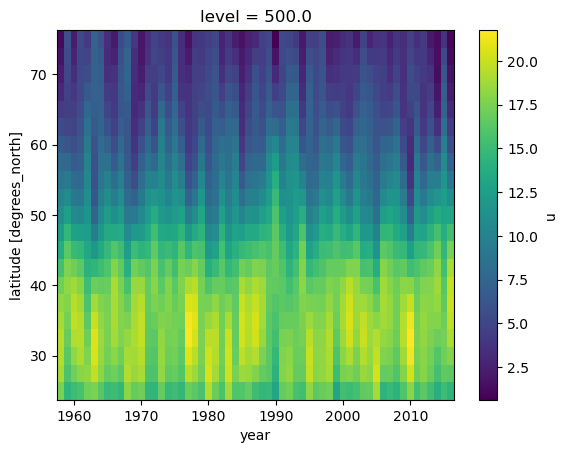

In [94]:
u.plot(x='year', y='lat') 

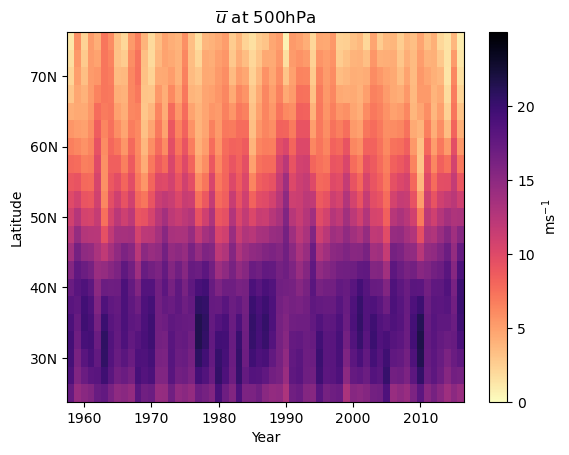

In [95]:
fig, ax = plt.subplots()
u.plot(ax=ax, cmap='magma_r', vmin=0, vmax=25,
       cbar_kwargs={'label': 'ms$^{-1}$', 'ticks':[0, 5, 10, 15, 20]})
ax.set_yticks(np.arange(30,80,10))
ax.set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
ax.set_title('$\\overline{u}$ at 500hPa')
ax.set_ylabel('Latitude')
ax.set_xlabel('Year')
plt.show()

# DJF Northward EP Flux Divergence

In [96]:
# separate into interannual means
div1 = ds.div1.groupby('time.year').mean('time').load()

# slice data at 500hPA and set EFP boundaries
div1 = div1.sel( level = 500. )
div1 = div1.where( ds.lat >= 25., drop=True )
div1 = div1.where( ds.lat <= 75., drop=True )

# flip axes so time on x-axis
div1 = div1.transpose()

div1

<xarray.DataArray 'div1' (lat: 21, year: 59)>
array([[-1.03583153, -1.11393982, -1.55853571, ..., -1.05176384,
        -0.68110864, -1.18939   ],
       [-0.89122262, -1.28108821, -1.95563638, ..., -1.317711  ,
        -0.92074982, -1.18097059],
       [-1.40713018, -1.18839348, -2.28724956, ..., -1.84022383,
        -0.93515104, -1.26757106],
       ...,
       [ 0.94951773,  0.85573617,  0.92996498, ...,  0.73627497,
         0.80738217,  0.75315103],
       [ 0.54102816,  0.26112512,  0.24811177, ...,  0.04678598,
         0.43040123,  0.06478691],
       [-0.07948003, -0.26193783, -0.45000286, ..., -0.52452896,
        -0.09184792, -0.39956733]])
Coordinates:
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 35.0 32.5 30.0 27.5 25.0
  * year     (year) int64 1958 1959 1960 1961 1962 ... 2012 2013 2014 2015 2016
    level    float64 500.0

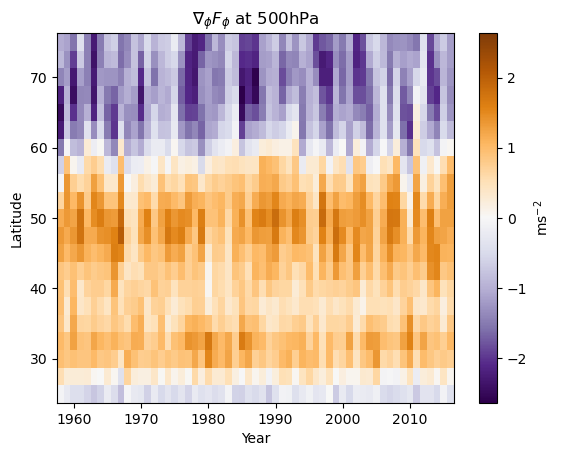

In [97]:
fig, ax = plt.subplots()
div1.plot(ax=ax, cmap='PuOr_r',
       cbar_kwargs={'label': 'ms$^{-2}$'})
ax.set_title('$\\nabla_\\phi F_\\phi$ at 500hPa')
ax.set_ylabel('Latitude')
ax.set_xlabel('Year')
plt.show()

# Plot both Figures

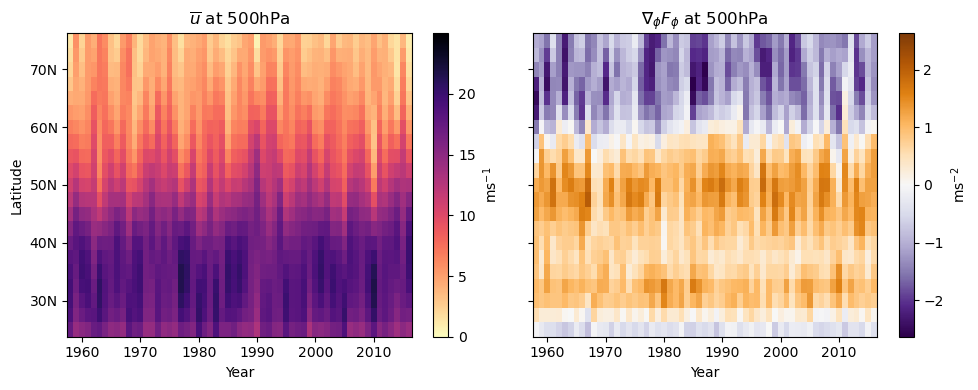

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))

# plot ubar
u.plot(ax=ax1, cmap='magma_r', vmin=0, vmax=25,
       cbar_kwargs={'label': 'ms$^{-1}$', 'ticks':[0, 5, 10, 15, 20]})
ax1.set_yticks(np.arange(30,80, 10))
ax1.set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
ax1.set_title('$\\overline{u}$ at 500hPa')
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Year')


# plot div1
div1.plot(ax=ax2, cmap='PuOr_r',
       cbar_kwargs={'label': 'ms$^{-2}$'})
ax2.set_title('$\\nabla_\\phi F_\\phi$ at 500hPa')
ax2.set_ylabel('')
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

# Covariance

In [99]:
uanom = (u- u.mean('year'))
div1anom = (div1- div1.mean('year'))

prod = uanom*div1anom

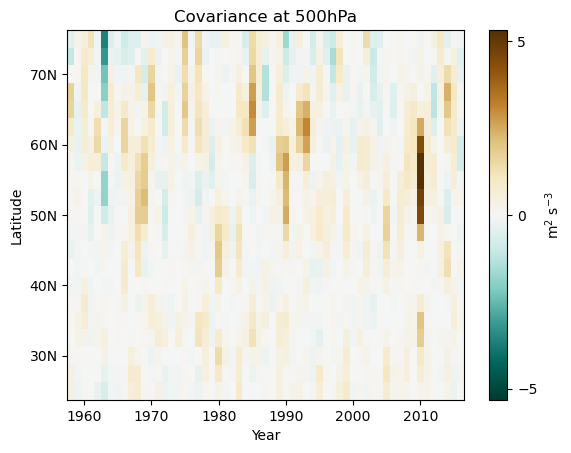

In [100]:
fig, ax = plt.subplots()
prod.plot(ax=ax, cmap='BrBG_r', cbar_kwargs={'label': 'm$^2$ s$^{-3}$', 'ticks':[-5,0,5]})
ax.set_title('Covariance at 500hPa')
ax.set_yticks(np.arange(30,80, 10))
ax.set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
ax.set_ylabel('Latitude')
ax.set_xlabel('Year')
plt.show()

# Correlation

In [101]:
ustd = u.std()
div1std = div1.std()

corr = prod / (ustd * div1std)

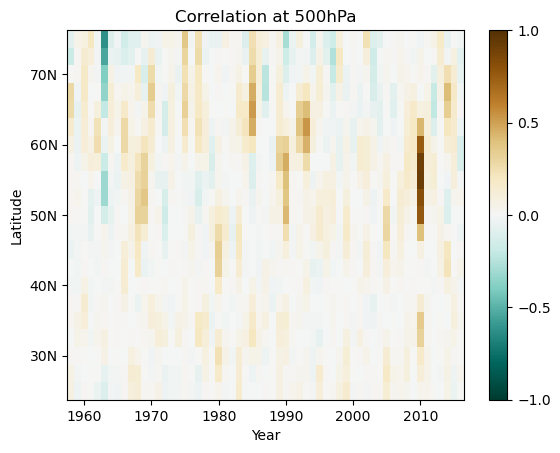

In [102]:
fig, ax = plt.subplots()
corr.plot(ax=ax, cmap='BrBG_r', vmin=-1., vmax=1.,
          cbar_kwargs={'ticks':[-1,-0.5,0,0.5,1]})
ax.set_title('Correlation at 500hPa')
ax.set_yticks(np.arange(30,80, 10))
ax.set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
ax.set_ylabel('Latitude')
ax.set_xlabel('Year')
plt.show()

# Plot all figures

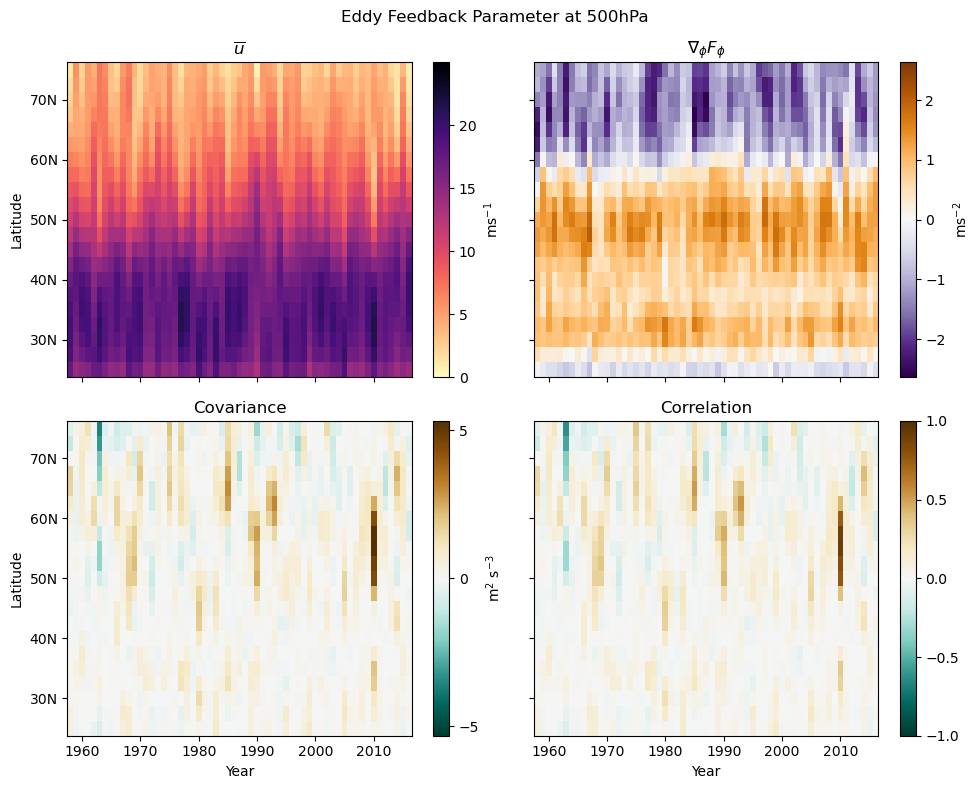

In [103]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(10,8))

# plot ubar
u.plot(ax=axs[0,0], cmap='magma_r', vmin=0, vmax=25,
       cbar_kwargs={'label': 'ms$^{-1}$', 'ticks':[0, 5, 10, 15, 20]})
axs[0,0].set_yticks(np.arange(30,80, 10))
axs[0,0].set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
axs[0,0].set_title('$\\overline{u}$')
axs[0,0].set_ylabel('Latitude')
axs[0,0].set_xlabel('')


# plot div1
div1.plot(ax=axs[0,1], cmap='PuOr_r',
       cbar_kwargs={'label': 'ms$^{-2}$'})
axs[0,1].set_title('$\\nabla_\\phi F_\\phi$')
axs[0,1].set_ylabel('')
axs[0,1].set_xlabel('')

# plot covariance
prod.plot(ax=axs[1,0], cmap='BrBG_r', cbar_kwargs={'label': 'm$^2$ s$^{-3}$', 'ticks':[-5,0,5]})
axs[1,0].set_title('Covariance')
axs[1,0].set_ylabel('Latitude')
axs[1,0].set_xlabel('Year')

# plot correlation
corr.plot(ax=axs[1,1], cmap='BrBG_r', vmin=-1., vmax=1.,
          cbar_kwargs={'ticks':[-1,-0.5,0,0.5,1]})
axs[1,1].set_title('Correlation')
axs[1,1].set_ylabel('')
axs[1,1].set_xlabel('Year')

fig.suptitle('Eddy Feedback Parameter at 500hPa')

plt.tight_layout()
plt.show()